In [17]:
"""
@author: Akshay
"""

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [21]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [22]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('bike.png', target_size=(224, 224))

In [13]:
# from keras.preprocessing.image import img_to_array
# # convert the image pixels to a numpy array
# image = img_to_array(image)
image=np.asarray(image)

In [14]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

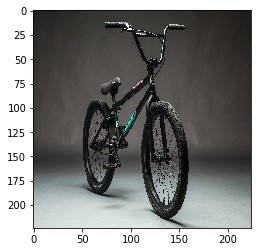

In [15]:
from PIL import Image
image_pillow = Image.fromarray(image.reshape(224,224,3))
plt.imshow(image_pillow)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


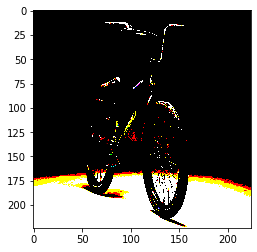

In [18]:
img = tf.io.read_file('bike.png')
img = tf.image.decode_png(img, channels = 3)
img = tf.image.resize(img,(224,224))
img = preprocess_input(img)
plt.imshow(img)

In [19]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

0

In [84]:
yhat = model.predict(image)

In [85]:
print(yhat.shape)

(1, 1000)


In [86]:
print(image.shape)

(1, 224, 224, 3)


In [87]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

tricycle (45.54%)


In [93]:
encoder = keras.Model(inputs = model.inputs, outputs = [model.get_layer('block5_conv3').output])

In [94]:
print(encoder.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   